In [58]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy.interpolate as spi
import xarray as xr

data_file_list = glob.glob('/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/*.DAT')

print(data_file_list)

column_names = ['FileFormat','ymd','hms','julianday','Gravity','3_min_Gravity',
                'six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen','sixteen',
                'Longitude','Latitude','nineteen','twenty','twentyone']

df_list = []
for data_file in data_file_list:
    
    df_tmp = pd.read_csv(data_file, header=None, names=column_names)
    
    df_list.append(df_tmp)
    #df_list.append(df_tmp[['ymd','hms','Gravity','3_min_Gravity','Longitude','Latitude']])
    
df = pd.concat(df_list)

df.ymd = df.ymd.str.replace(' ','0')
df.hms = df.hms.str.replace(' ','0')

res = df['ymd']+' '+df['hms']
df['timeindex'] = pd.to_datetime(res)
df = df.set_index('timeindex')

df.sort_index(inplace=True)

df


['/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_226.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_232.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_245.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_220.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_234.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_239.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_243.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_218.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_233.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_227.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII/Data/GravMagFromIN2019_V04/gravity/2019_244.S-166.DAT', '/Users/simon/Dropbox/ECOSATIII

,FileFormat,ymd,hms,julianday,Gravity,3_min_Gravity,six,seven,eight,nine,...,twelve,thirteen,fourteen,fifteen,sixteen,Longitude,Latitude,nineteen,twenty,twentyone
timeindex,,,,,,,,,,,,,,,,,,,,,
2019-08-05 23:59:59,$DAT,2019/08/05,23:59:59.00,217,8447.81,8447.93,-1956.53,0.00,0.01,-0.01,...,0.01,0.06,-0.04,-0.24,0.0,145.780701,-16.925715,0.0,281.25,NaN
2019-08-06 00:00:00,$DAT,2019/08/06,00:00:00.00,218,8447.81,8447.93,-1780.65,0.00,0.01,-0.00,...,0.00,0.06,-0.02,-0.23,0.0,145.780701,-16.925715,0.0,278.51,NaN
2019-08-06 00:00:01,$DAT,2019/08/06,00:00:01.00,218,8447.81,8447.93,-1975.21,0.00,0.00,-0.00,...,0.00,0.06,-0.03,-0.23,0.0,145.780701,-16.925715,0.0,281.10,NaN
2019-08-06 00:00:02,$DAT,2019/08/06,00:00:02.00,218,8447.81,8447.93,-1825.18,0.00,0.01,-0.01,...,0.00,0.07,-0.03,-0.24,0.0,145.780701,-16.925715,0.0,281.91,NaN
2019-08-06 00:00:03,$DAT,2019/08/06,00:00:03.00,218,8447.81,8447.93,-2791.30,0.00,0.01,-0.01,...,0.02,0.09,-0.11,-0.28,0.0,145.780701,-16.925715,0.0,283.49,NaN
2019-08-06 00:00:04,$DAT,2019/08/06,00:00:04.00,218,8447.82,8447.93,-1971.25,0.00,0.01,-0.01,...,0.01,0.08,-0.05,-0.26,0.0,145.780701,-16.925715,0.0,288.43,NaN
2019-08-06 00:00:05,$DAT,2019/08/06,00:00:05.00,218,8447.82,8447.93,-1990.05,0.00,0.01,-0.01,...,0.01,0.08,-0.00,-0.27,0.0,145.780701,-16.925715,0.0,288.76,NaN
2019-08-06 00:00:06,$DAT,2019/08/06,00:00:06.00,218,8447.82,8447.93,-2098.53,0.00,0.00,-0.01,...,0.00,0.07,-0.02,-0.26,0.0,145.780701,-16.925715,0.0,292.63,NaN
2019-08-06 00:00:07,$DAT,2019/08/06,00:00:07.00,218,8447.82,8447.93,-1792.03,0.00,0.00,-0.00,...,0.00,0.07,0.01,-0.25,0.0,145.780701,-16.925715,0.0,299.01,NaN


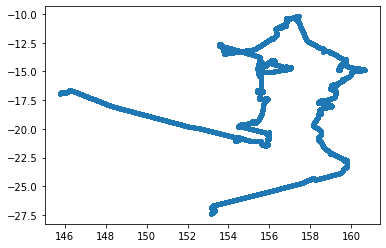

In [42]:
plt.plot(df.Longitude,df.Latitude,'.')
plt.show()


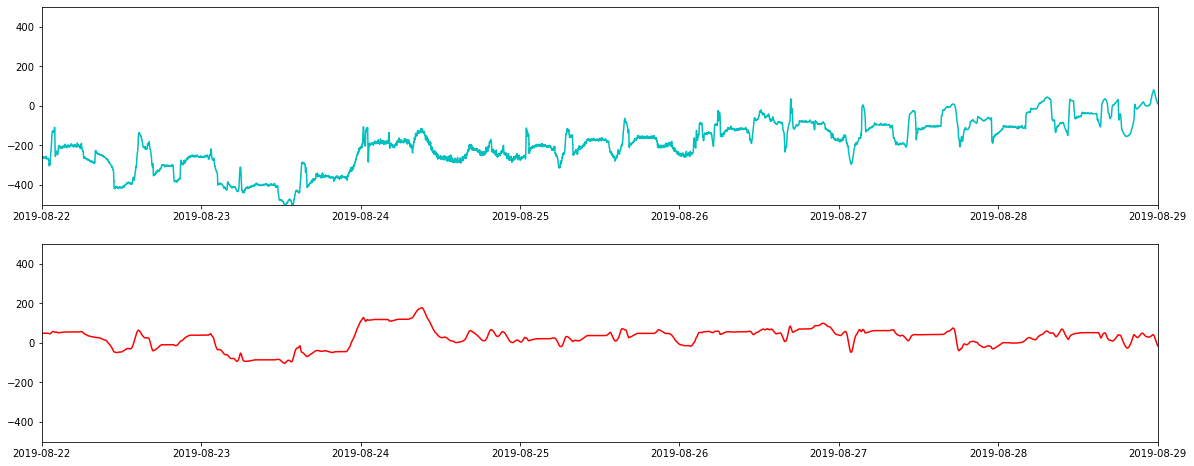

In [60]:
ds = xr.open_dataset('/Users/simon/Work/ECOSAT3/DATA/background/Data/Grids/grav24_SWPac.nc')

f = spi.RectBivariateSpline(ds['lon'].data,ds['lat'].data,ds['z'].data.T)
tmp = f.ev(df.Longitude,df.Latitude)
satellite_gravity_at_points = tmp.flatten()


plt.figure(figsize=(20,8))

plt.subplot(211)
#plt.plot(df['Gravity'],'b')
plt.plot(df['3_min_Gravity']-np.mean(df['3_min_Gravity']),'c')
plt.xlim(pd.Timestamp('2019-08-22 00:00:00'), pd.Timestamp('2019-08-29 00:00:00'))
plt.ylim(-500,500)

plt.subplot(212)
plt.plot(df.index,satellite_gravity_at_points,'r')
plt.xlim(pd.Timestamp('2019-08-22 00:00:00'), pd.Timestamp('2019-08-29 00:00:00'))
plt.ylim(-500,500)

plt.show()
